# Price Optimization Analysis 💰

โปรเจกต์วิเคราะห์หาราคาขายที่เหมาะสมที่สุด (Optimal Price) เพื่อสร้างรายได้สูงสุด โดยใช้ Python จำลองกราฟ Demand และ Revenue

### สิ่งที่ทำในโปรเจกต์:
- สร้างโมเดลความต้องการซื้อ (Demand) เทียบกับราคา 
- คำนวณจุดคุ้มทุนและรายได้สูงสุดด้วย `scipy.optimize`
- พล็อตกราฟแสดงผลลัพธ์จุด Optimal Price ที่ชัดเจนและเข้าใจง่าย


In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# 1. Model Parameters (Demand parameters derived from analysis)
# a (intercept): The theoretical max units sold if price was 0
# b (slope): Sensitivity to price changes (elasticity proxy)
a_param = 100
b_param = 2

print(f"Model Parameters: Intercept (a)={a_param}, Slope (b)={b_param}")

Model Parameters: Intercept (a)=100, Slope (b)=2


In [16]:
# 2. Define Business Functions

def calculate_demand(price, a, b):
    """Calculates units sold. Max returns 0 if price is too high (demand cannot be negative)."""
    return np.maximum(0, a - b * price)

def calculate_revenue(price, a, b):
    """Calculates revenue: Price * Units Sold."""
    units = calculate_demand(price, a, b)
    return price * units

def objective_function(price, a, b):
    """Negative revenue for minimization algorithms (since we want to maximize revenue)."""
    return -calculate_revenue(price, a, b)

In [17]:
# 3. Find Optimal Price (Optimization)

# Initial guess
x0 = [10.0]

# Optimization using Scipy
# Constraints/Bounds can be added if needed, e.g., price > 0
result = minimize(objective_function, x0, args=(a_param, b_param), method='Nelder-Mead')

optimal_price = result.x[0]
max_revenue = -result.fun

print(f"Optimization Result:")
print(f"  Optimal Price:   {optimal_price:.2f} THB")
print(f"  Maximum Revenue: {max_revenue:.2f} THB")

Optimization Result:
  Optimal Price:   25.00 THB
  Maximum Revenue: 1250.00 THB


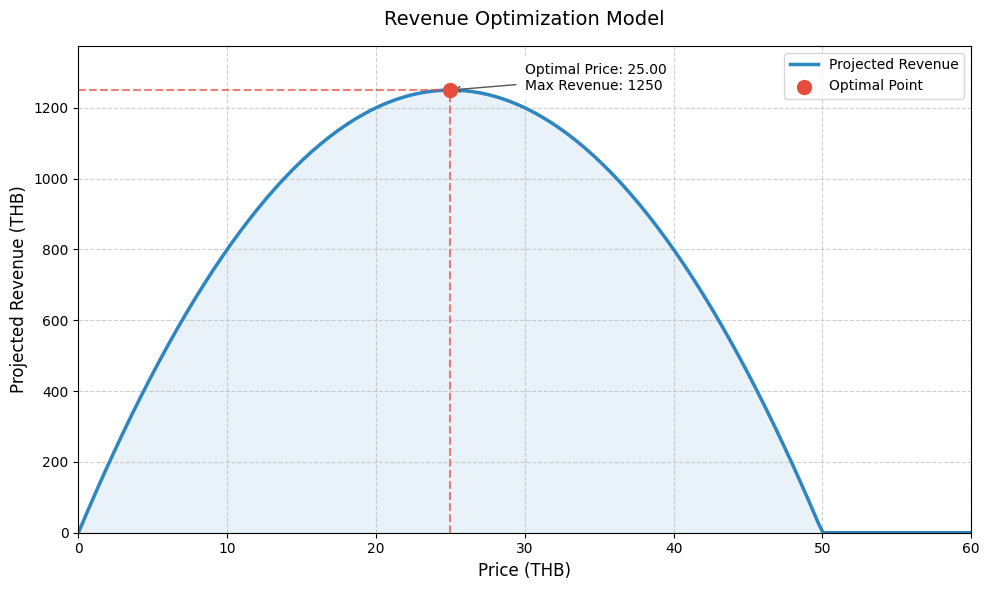

In [18]:
# 4. Visualization

# Create a logical price range for plotting (from 0 to where demand hits 0)
# Demand hits 0 when price = a/b = 100/2 = 50. Let's plot up to 60 to show the drop.
price_range = np.linspace(0, 60, 200)
revenue_curve = calculate_revenue(price_range, a_param, b_param)

# Plotting
plt.figure(figsize=(10, 6), dpi=100)

# Plot the Revenue Curve
plt.plot(price_range, revenue_curve, label='Projected Revenue', color='#2E86C1', linewidth=2.5)

# Highlight the Optimal Price
plt.scatter([optimal_price], [max_revenue], color='#E74C3C', s=100, zorder=5, label='Optimal Point')
plt.vlines(optimal_price, 0, max_revenue, color='#E74C3C', linestyle='--', alpha=0.7)
plt.hlines(max_revenue, 0, optimal_price, color='#E74C3C', linestyle='--', alpha=0.7)

# Annotate the optimal point
plt.annotate(f'Optimal Price: {optimal_price:.2f}\nMax Revenue: {max_revenue:.0f}',
             xy=(optimal_price, max_revenue),
             xytext=(optimal_price + 5, max_revenue),
             arrowprops=dict(arrowstyle='->', color='#555555'),
             fontsize=10, backgroundcolor='white')

# Styling
plt.title('Revenue Optimization Model', fontsize=14, pad=15)
plt.xlabel('Price (THB)', fontsize=12)
plt.ylabel('Projected Revenue (THB)', fontsize=12)
plt.legend(loc='upper right')
plt.grid(True, linestyle='--', alpha=0.6)
plt.xlim(0, 60)
plt.ylim(0, max_revenue * 1.1)

# Fill area under curve for better visual effect
plt.fill_between(price_range, revenue_curve, color='#2E86C1', alpha=0.1)

plt.tight_layout()
plt.show()